In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits import mplot3d
import math
plt.style.use('seaborn-poster')

C:\Users\maria\AppData\Local\Temp\ipykernel_26460\282003503.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-poster')


In [2]:
@np.vectorize
def calculo_iqb(Ts, Fs):
    """Calcula o índice de qualidade do banho (iqb).
    
    Argumentos:
        Ts (float): Temperatura de saída do chuveiro.
        Fs (float): Vazão da válvula de saída.

    Retorna:
        iqb (float): Índice de qualidade do banho.
    """
    iqb = (1 / math.e) * math.exp((1 - ((Ts - 38 + 0.02 * Fs) / 2) ** 2) * np.power((0.506 + math.log10(math.log10((10000 * np.sqrt(Fs)) / (10 + Fs + 0.004 * np.power(Fs, 4))))), 20))

    #if np.isnan(iqb) or iqb == None or np.isinf(abs(iqb)):
    #    iqb = 0
        
    return iqb

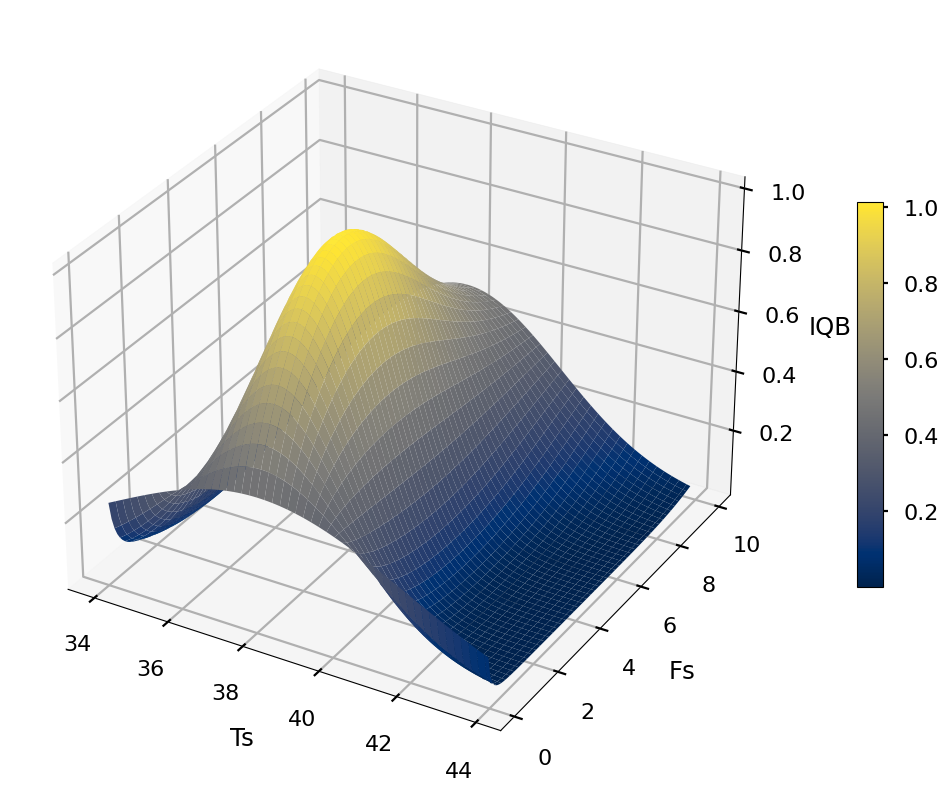

In [3]:
fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection='3d')

fs = np.arange(0.1, 10, 0.1) # Fs
ts = np.arange(34, 44, 0.1) # T4a

Fs, Ts = np.meshgrid(fs, ts)
IQB = calculo_iqb(Ts, Fs)

surf = ax.plot_surface(Ts, Fs, IQB, cmap=plt.cm.cividis)

# Set axes label
ax.set_xlabel('Ts', labelpad=20)
ax.set_ylabel('Fs', labelpad=20)
ax.set_zlabel('IQB', labelpad=20)

fig.colorbar(surf, shrink=0.5, aspect=15)

plt.show()

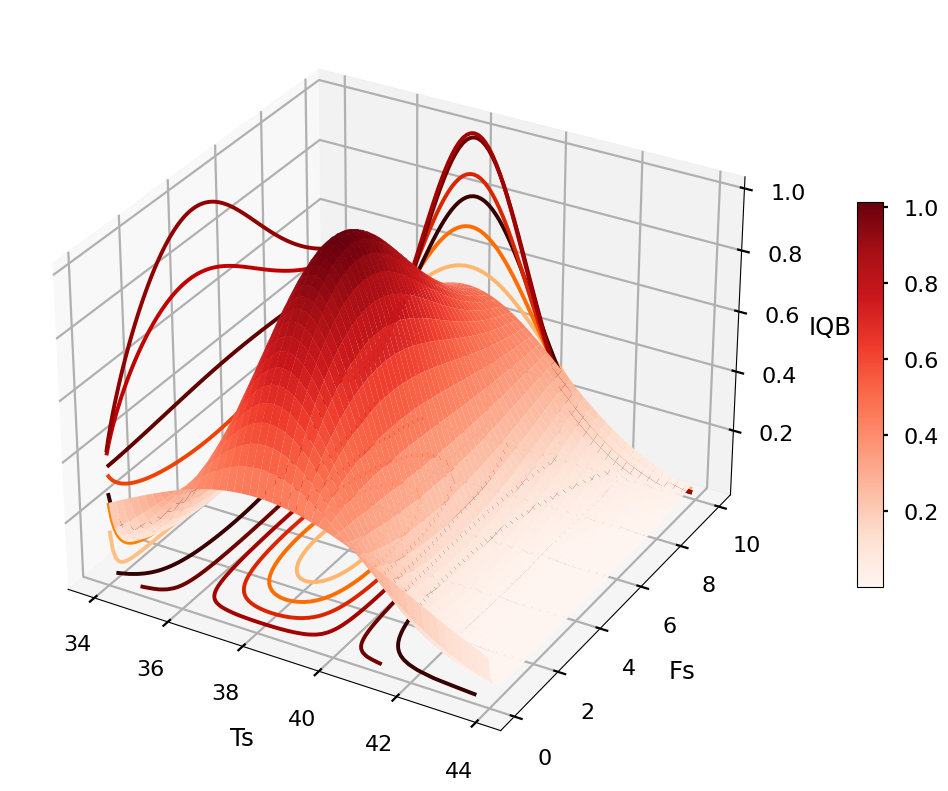

In [10]:
fig = plt.figure(figsize = (20, 10))
ax = plt.axes(projection='3d')

fs = np.arange(0.1, 10, 0.1) # Fs
ts = np.arange(34, 44, 0.1) # T4a

Fs, Ts = np.meshgrid(fs, ts)
IQB = calculo_iqb(Ts, Fs)

surf = ax.plot_surface(Ts, Fs, IQB, cmap="Reds")

# Set axes label
ax.set_xlabel('Ts', labelpad=20)
ax.set_ylabel('Fs', labelpad=20)
ax.set_zlabel('IQB', labelpad=20)

ax.contour(Ts, Fs, IQB, zdir="z", offset=0, cmap="gist_heat")
ax.contour(Ts, Fs, IQB, zdir="x", offset=34, cmap="gist_heat")
ax.contour(Ts, Fs, IQB, zdir="y", offset=10, cmap="gist_heat")

fig.colorbar(surf, shrink=0.5, aspect=15)

plt.show()

In [1]:
import pandas as pd
import numpy as np

time_total = np.arange(start=0, stop=14 + 0.07, step=0.01, dtype="float")
time_actions = np.arange(start=1, stop=8, step=1, dtype="int")

iqb_a = pd.read_csv("iqb_confA.csv")
iqb_a["ação"] = time_actions
iqb_b = pd.read_csv("iqb_confB.csv")
iqb_b["ação"] = time_actions

vars_a = pd.read_csv("variables_confA.csv")
vars_a["tempo"] = time_total
vars_b = pd.read_csv("variables_confB.csv")
vars_b["tempo"] = time_total
vars_b

,SPTq,Tq,Tt,SPTs,Ts,Sr,Sa,Fs,tempo
0,70.0,55.000000,25.000000,40.0,25.000000,0.99,1.0,10.923171,0.00
1,70.0,55.164800,25.078094,40.0,25.000000,0.99,1.0,10.923171,0.01
2,70.0,55.320187,25.156248,40.0,25.000000,0.99,1.0,10.923171,0.02
3,70.0,55.466810,25.234444,40.0,25.000000,0.99,1.0,10.923171,0.03
4,70.0,55.605269,25.312665,40.0,25.000000,0.99,1.0,10.923171,0.04
...,...,...,...,...,...,...,...,...,...
1402,61.3,61.114169,39.999616,40.0,38.386849,0.00,0.0,4.308563,14.02
1403,61.3,60.488403,39.999082,40.0,38.386876,0.00,0.0,4.308563,14.03
1404,61.3,59.868697,39.998347,40.0,38.386903,0.00,1.0,4.308563,14.04
1405,61.3,61.731186,39.997993,40.0,38.386931,0.00,1.0,4.308563,14.05


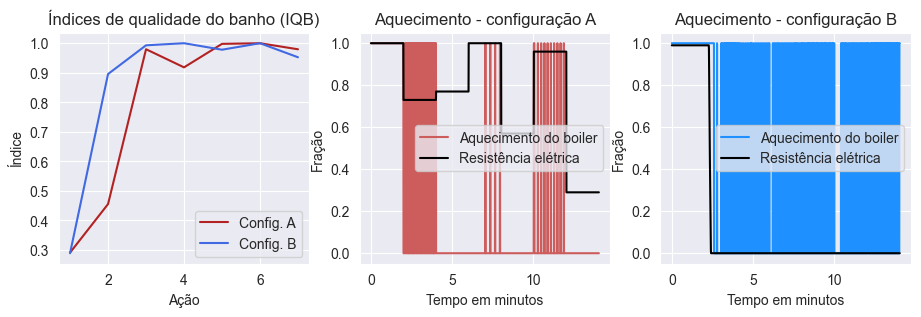

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráficos:
sns.set_style("darkgrid")
fig, ax = plt.subplots(1, 3, figsize=(11, 3))
ax[0].plot(iqb_a["ação"].to_numpy(), iqb_a["IQB"].to_numpy(), label="Config. A", color="firebrick", linestyle="solid")
ax[0].plot(iqb_b["ação"].to_numpy(), iqb_b["IQB"].to_numpy(), label="Config. B", color="royalblue", linestyle="solid")
ax[0].set_title("Índices de qualidade do banho (IQB)")
ax[0].set_xlabel("Ação")
ax[0].set_ylabel("Índice")
ax[0].legend()

ax[1].plot(vars_a["tempo"].to_numpy(), vars_a["Sa"].to_numpy(), label="Aquecimento do boiler", color="indianred", linestyle="solid")
ax[1].plot(vars_a["tempo"].to_numpy(), vars_a["Sr"].to_numpy(), label="Resistência elétrica", color="black", linestyle="solid")
ax[1].set_title("Aquecimento - configuração A")
ax[1].set_xlabel("Tempo em minutos")
ax[1].set_ylabel("Fração")
ax[1].legend()

ax[2].plot(vars_b["tempo"].to_numpy(), vars_b["Sa"].to_numpy(), label="Aquecimento do boiler", color="dodgerblue", linestyle="solid")
ax[2].plot(vars_b["tempo"].to_numpy(), vars_b["Sr"].to_numpy(), label="Resistência elétrica", color="black", linestyle="solid")
ax[2].set_title("Aquecimento - configuração B")
ax[2].set_xlabel("Tempo em minutos")
ax[2].set_ylabel("Fração")
ax[2].legend()
plt.show()

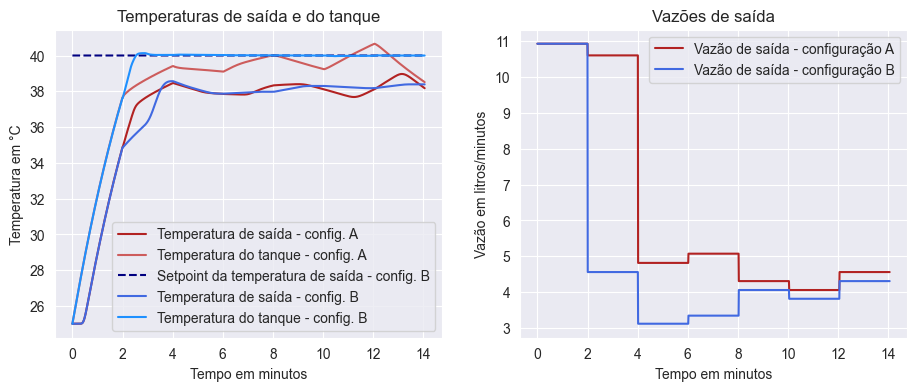

In [10]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

ax[0].plot(vars_a["tempo"].to_numpy(), vars_a["Ts"].to_numpy(), label="Temperatura de saída - config. A", color="firebrick", linestyle="solid")
ax[0].plot(vars_a["tempo"].to_numpy(), vars_a["Tt"].to_numpy(), label="Temperatura do tanque - config. A", color="indianred", linestyle="solid")
ax[0].plot(vars_b["tempo"].to_numpy(), vars_b["SPTs"].to_numpy(), label="Setpoint da temperatura de saída - config. B", color="navy", linestyle="dashed")
ax[0].plot(vars_b["tempo"].to_numpy(), vars_b["Ts"].to_numpy(), label="Temperatura de saída - config. B", color="royalblue", linestyle="solid")
ax[0].plot(vars_b["tempo"].to_numpy(), vars_b["Tt"].to_numpy(), label="Temperatura do tanque - config. B", color="dodgerblue", linestyle="solid")
ax[0].set_title("Temperaturas de saída e do tanque")
ax[0].set_xlabel("Tempo em minutos")
ax[0].set_ylabel("Temperatura em °C")
ax[0].legend()

ax[1].plot(vars_a["tempo"].to_numpy(), vars_a["Fs"].to_numpy(), label="Vazão de saída - configuração A", color="firebrick", linestyle="solid")
ax[1].plot(vars_b["tempo"].to_numpy(), vars_b["Fs"].to_numpy(), label="Vazão de saída - configuração B", color="royalblue", linestyle="solid")
ax[1].set_title("Vazões de saída")
ax[1].set_xlabel("Tempo em minutos")
ax[1].set_ylabel("Vazão em litros/minutos")
ax[1].legend()
plt.show()